In [1]:
!pip install pm4py==2.2.31

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 25.9 MB/s 
     |████████████████████████████████| 40 kB 6.7 MB/s 
     |████████████████████████████████| 748 kB 45.9 MB/s 
     |████████████████████████████████| 1.6 MB 64.6 MB/s 
  Created wheel for pyvis: filename=pyvis-0.3.1-py3-none-any.whl size=755850 sha256=93f61156f681baadd25103c5131e6de6c011ac659926744a299e7b0c2ba5731b
  Stored in directory: /root/.cache/pip/wheels/a4/0c/61/8469ca276f96ab772c3acc7f47d71e9737cbdf6f446f017f48
  Created wheel for stringdist: filename=StringDist-1.0.9-cp38-cp38-linux_x86_64.whl size=24181 sha256=25ab052efa1bcdea7916ba0c0336377f69d2d0e0a87d1e209ddeff0c8a8ad5cf
  Stored in directory: /root/.cache/pip/wheels/7a/64/e2/16f6a25a62a78f951c1715adb24ba2271ae9d7872f42378c3a
Successfully built pyvis stringdist


In [2]:
import pm4py
import pandas as pd
from itertools import product, permutations
from datetime import datetime
import graphviz

In [3]:
def data_to_log(data):
  df = pd.DataFrame(columns=['case', 'activity', 'timestamp'])
  for i, case in enumerate(data):
    for activity in case:
      df = df.append({'case': i, 'activity': activity, 'timestamp': datetime.now()}, ignore_index=True)
  dataframe = pm4py.format_dataframe(df, case_id='case', activity_key='activity', timestamp_key='timestamp')
  return pm4py.convert_to_event_log(dataframe)

In [4]:
# data generatioln
l = [zip(w1,w2)
for w1 in permutations('ABCD') if w1.index("A") < w1.index("B") and w1.index("C") < w1.index("D")
for w2 in permutations('1234') if w2.index("1") < w2.index("2") and w2.index("3") < w2.index("4")  ]

data = [[x+y for (x,y) in z] for z in l ]

In [5]:
print(data[10])
print(data[20])
print(data[30])

['A3', 'C1', 'B4', 'D2']
['C1', 'A3', 'B4', 'D2']
['C1', 'D2', 'A3', 'B4']


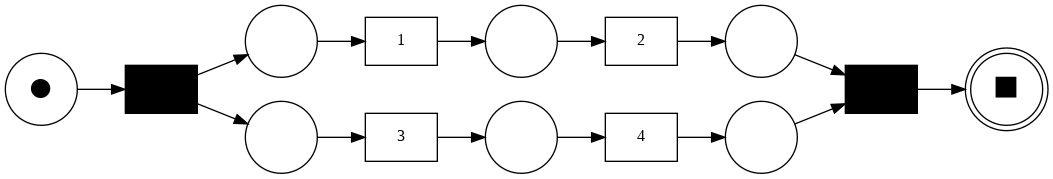

In [9]:
# data generatioln
l = [zip(w1,w2)
for w1 in permutations('ABCD') if w1.index("A") < w1.index("B") and w1.index("C") < w1.index("D")
for w2 in permutations('1234') if w2.index("1") < w2.index("2") and w2.index("3") < w2.index("4")  ]

data = [[x+y for (x,y) in z] for z in l ]
event_log = data_to_log(data)
net, initial_marking, final_marking = pm4py.discover_petri_net_inductive(event_log)
pm4py.write_pnml(net, initial_marking, final_marking, "AD14_model.pnml")
pm4py.view_petri_net(net, initial_marking, final_marking)


<ipython-input-11-102ebf98f405>:1: DeprecatedWarning: discover_tree_inductive is deprecated as of 2.2.2 and will be removed in 2.4.0. discover_tree_inductive is deprecated, use discover_process_tree_inductive
  process_tree = pm4py.discover_tree_inductive(event_log)


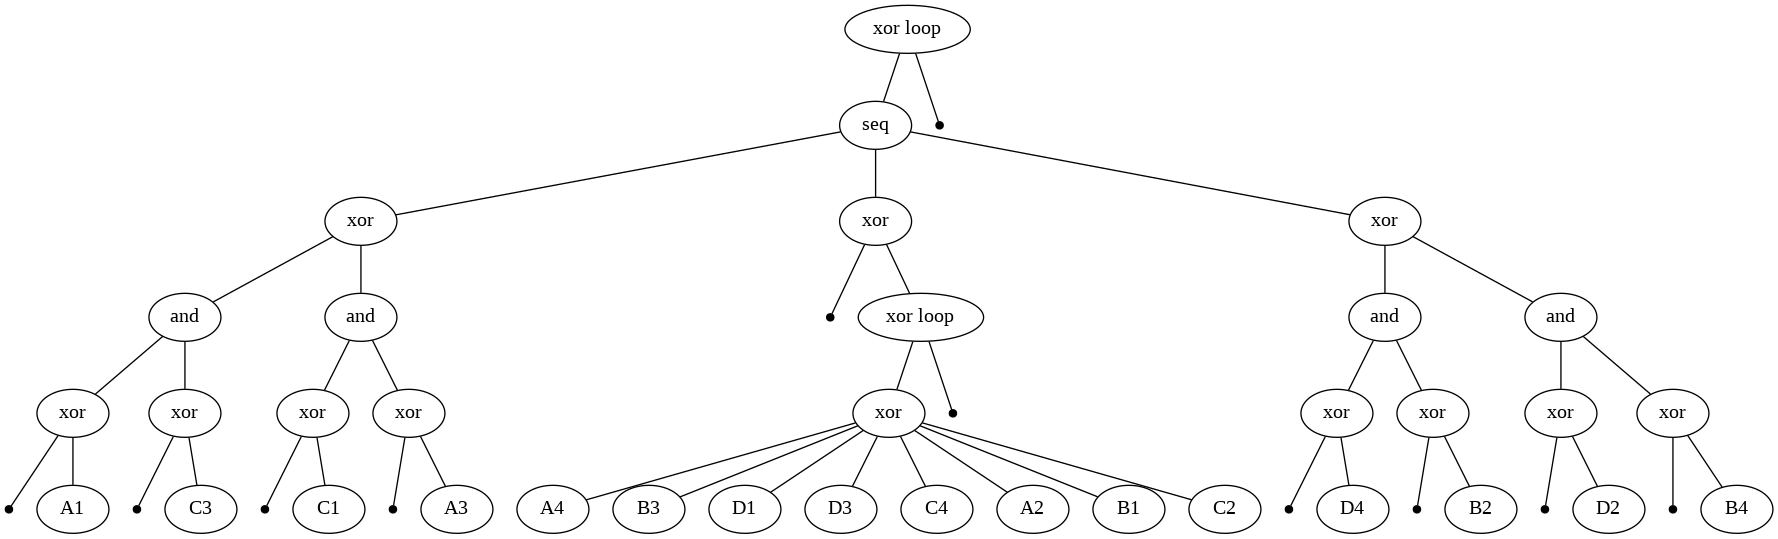

In [ ]:
process_tree = pm4py.discover_tree_inductive(event_log)
pm4py.view_process_tree(process_tree)

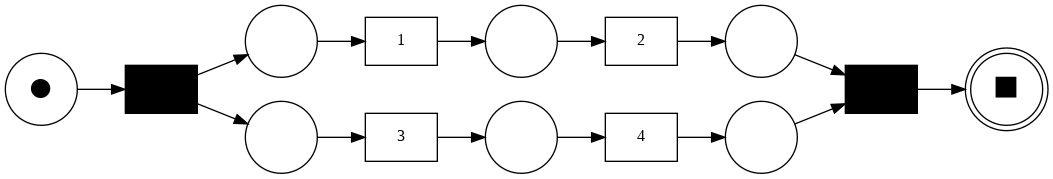

In [ ]:
# data generatioln
l = [zip(w1,w2)
for w1 in permutations('ABCD') if w1.index("A") < w1.index("B") and w1.index("C") < w1.index("D")
for w2 in permutations('1234') if w2.index("1") < w2.index("2") and w2.index("3") < w2.index("4")  ]

data = [[y for (x,y) in z] for z in l ]
event_log = data_to_log(data)
net, initial_marking, final_marking = pm4py.discover_petri_net_inductive(event_log)
pm4py.view_petri_net(net, initial_marking, final_marking)

<ipython-input-13-102ebf98f405>:1: DeprecatedWarning: discover_tree_inductive is deprecated as of 2.2.2 and will be removed in 2.4.0. discover_tree_inductive is deprecated, use discover_process_tree_inductive
  process_tree = pm4py.discover_tree_inductive(event_log)


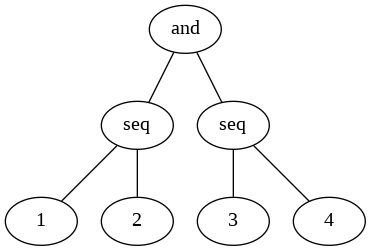

In [ ]:
process_tree = pm4py.discover_tree_inductive(event_log)
pm4py.view_process_tree(process_tree)

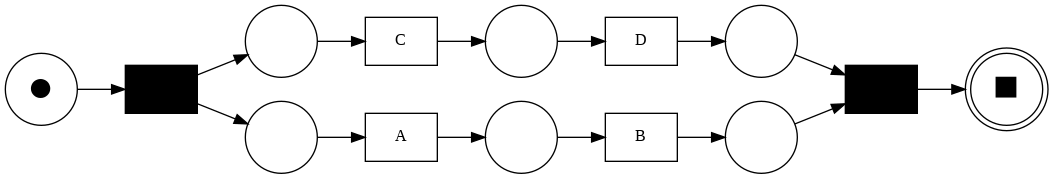

In [ ]:
# data generatioln
l = [zip(w1,w2)
for w1 in permutations('ABCD') if w1.index("A") < w1.index("B") and w1.index("C") < w1.index("D")
for w2 in permutations('1234') if w2.index("1") < w2.index("2") and w2.index("3") < w2.index("4")  ]


data = [[x for (x,y) in z] for z in l ]
event_log = data_to_log(data)
net, initial_marking, final_marking = pm4py.discover_petri_net_inductive(event_log)
pm4py.view_petri_net(net, initial_marking, final_marking)

<ipython-input-15-102ebf98f405>:1: DeprecatedWarning: discover_tree_inductive is deprecated as of 2.2.2 and will be removed in 2.4.0. discover_tree_inductive is deprecated, use discover_process_tree_inductive
  process_tree = pm4py.discover_tree_inductive(event_log)


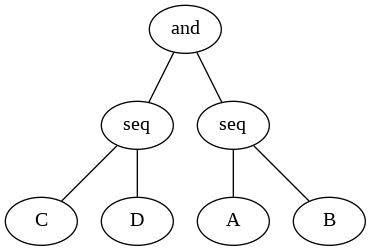

In [ ]:
process_tree = pm4py.discover_tree_inductive(event_log)
pm4py.view_process_tree(process_tree)

In [ ]:
# data to log
def data_to_log(data):
  df = pd.DataFrame(columns=['case', 'activity', 'timestamp'])
  for i, case in enumerate(data):
    for activity in case:
      df = df.append({'case': i, 'activity': activity, 'timestamp': datetime.now()}, ignore_index=True)
  dataframe = pm4py.format_dataframe(df, case_id='case', activity_key='activity', timestamp_key='timestamp')
  return pm4py.convert_to_event_log(dataframe)
event_log = data_to_log(data)

In [ ]:
# dfg extraction
dfg, start, end = pm4py.discover_directly_follows_graph(event_log)


In [ ]:
dot = graphviz.Digraph()
dot.graph_attr.update({'rankdir': 'LR'})
events = set([item for sublist in data for item in sublist])
for e in events:
  if e in start:
    dot.node(e, e, color="green")
  elif e in end:
    dot.node(e, e, color="red")
  else:
    dot.node(e, e)

for (orig, dest), freq in dfg.items():
  dot.edge(orig, dest, str(freq))
print(dot.source)

In [ ]:
process_tree = pm4py.discover_tree_inductive(event_log)
pm4py.view_process_tree(process_tree)

In [ ]:
# dfg reduction algorithm
import pm4py
import pandas as pd
from itertools import product, permutations
from datetime import datetime
import graphviz

# data generatioln
l = [zip(w1,w2)
for w1 in permutations('ABCD') if w1.index("A") < w1.index("B") and w1.index("C") < w1.index("D")
for w2 in permutations('1234') if w2.index("1") < w2.index("2") and w2.index("3") < w2.index("4")  ]

data = [[x+y for (x,y) in z] for z in l ]

def data_to_log(data):
  df = pd.DataFrame(columns=['case', 'activity', 'timestamp'])
  for i, case in enumerate(data):
    for activity in case:
      df = df.append({'case': i, 'activity': activity, 'timestamp': datetime.now()}, ignore_index=True)
  dataframe = pm4py.format_dataframe(df, case_id='case', activity_key='activity', timestamp_key='timestamp')
  return pm4py.convert_to_event_log(dataframe)
event_log = data_to_log(data)


from collections import Counter
from copy import deepcopy

def get_reduced_edges(events, dfg, start, end):
  d = {}
  for e1 in events:
    for e2 in events:
      reduced_edges = 0
      if e1==e2 or (e2, e1) in d:
        continue
      if (e1 in start and not e2 in start) or (not e1 in start and e2 in start):
        continue
      if (e1 in end and not e2 in end) or (not e1 in end and e2 in end):
        continue
      if (e1,e2) in dfg:
        continue
      if (e2,e1) in dfg:
        continue
      for s in events:
        if (s, e1) in dfg and (s, e2) in dfg:
          reduced_edges += 1
        if (e1, s) in dfg and (e2, s) in dfg:
          reduced_edges += 1
      d[(e1,e2)] = reduced_edges
  return d

def merge_vertices(dfg, start, end, v1, v2):
  new_dfg, new_start, new_end = deepcopy(dfg), deepcopy(start), deepcopy(end)
  vertex = ",".join([v1,v2])
  if v1 in new_start and v2 in new_start:
    a = new_start.pop(v1)
    b = new_start.pop(v2)
    new_start[",".join([v1,v2])] = a + b
  if v1 in new_end and v2 in new_end:
    a = new_end.pop(v1)
    b = new_end.pop(v2)
    new_end[",".join([v1,v2])] = a + b
  for (orig, dest), freq in dfg.items():
    if v1 == orig or v2 == orig:
      new_dfg.pop((orig, dest))
      new_dfg[(vertex, dest)] = new_dfg.get((vertex, dest), 0) + freq
    if v1 == dest or v2 == dest:
      new_dfg.pop((orig, dest))
      new_dfg[(orig, vertex)] = new_dfg.get((vertex, dest), 0) + freq
  return new_dfg, new_start, new_end


events = set([item for sublist in data for item in sublist])
dfg, start, end = pm4py.discover_directly_follows_graph(event_log)
reduced_edges = get_reduced_edges(events, dfg, start, end)
while len(reduced_edges) != 0:
  v1, v2 = max(reduced_edges, key=reduced_edges.get)
  print(v1, v2)
  dfg, start, end = merge_vertices(dfg, start, end, v1, v2)
  events = [x for x in events if not x in [v1, v2]] + [",".join([v1,v2])]
  reduced_edges = get_reduced_edges(events, dfg, start, end)

dot = graphviz.Digraph()
dot.graph_attr.update({'rankdir': 'LR'})
for e in events:
  if e in start:
    dot.node(e, e, color="green")
  elif e in end:
    dot.node(e, e, color="red")
  else:
    dot.node(e, e)

for (orig, dest), freq in dfg.items():
  dot.edge(orig, dest, str(freq))
print(dot.source)

In [ ]:
event_mapper = {}
for new_event in events:
  for e in new_event.split(","):
    event_mapper[e] = new_event
converted_data = [[event_mapper[e] for e in w] for w in data]
event_log = data_to_log(converted_data)
process_tree = pm4py.discover_tree_inductive(event_log)
pm4py.view_process_tree(process_tree)

In [ ]:
net, initial_marking, final_marking = pm4py.discover_petri_net_inductive(event_log)
pm4py.view_petri_net(net, initial_marking, final_marking)

In [ ]:
net.transitions

In [ ]:
original_events

In [ ]:
from itertools import product
import pandas as pd
results = pd.DataFrame(columns=["group",
                                "places",
                                "transitions",
                                "arcs",])
original_events = ['A1', 'A2', 'A3', 'A4', 'B1', 'B2', 'B3', 'B4', 'C1', 'C2', 'C3', 'C4', 'D1', 'D2', 'D3', 'D4']
groupings = set()
for group in product(range(4), repeat=len(original_events)):
  events = []
  for i in range(4):
    events.append(",".join([x for j, x in zip(group, original_events) if j == i]))
  events = tuple(sorted(events))
  if events in groupings:
    continue
  groupings.add(events)
  event_mapper = {}
  for new_event in events:
    for e in new_event.split(","):
      event_mapper[e] = new_event
  converted_data = [[event_mapper[e] for e in w] for w in data]
  event_log = data_to_log(converted_data)
  net, initial_marking, final_marking = pm4py.discover_petri_net_inductive(event_log)
  #pm4py.view_petri_net(net, initial_marking, final_marking)
  results = results.append({"group": events,
                            "places": len(net.places),
                            "transitions": len(net.transitions),
                            "arcs": len(net.arcs)},
                             ignore_index=True)
results.to_csv("results.csv", index=False)

# **Tic Tac Toe**

In [ ]:
import pm4py
import pandas as pd
from itertools import product, permutations
from datetime import datetime
from concurrent.futures import ThreadPoolExecutor

def data_to_log(data, k):
  df = pd.DataFrame(columns=['case', 'activity', 'timestamp'])
  for i, case in enumerate(data):
    if i % 1000 == k:
      for activity in case:
        df = df.append({'case': i, 'activity': activity, 'timestamp': datetime.now()}, ignore_index=True)
  #dataframe = pm4py.format_dataframe(df, case_id='case', activity_key='activity', timestamp_key='timestamp')
  return df

In [ ]:
# ttt
data = []
with open("ttt_traces.csv", 'r') as f:
    for line in f:
        data.append(line.strip().split(","))
with ThreadPoolExecutor(1000) as executor:
    processes = [executor.submit(data_to_log, data[:5000], i) for i in range(1000)]
    results = [p.result() for p in processes]
dataframe = pd.concat(results)
dataframe.to_csv('ttt_log_df.csv', index=False)

In [ ]:
process_tree = pm4py.discover_tree_inductive(event_log)
pm4py.view_process_tree(process_tree)